In [9]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
#Загружаем и визуализируем данные

In [11]:
df = pd.read_excel('flats.xlsx')
euro_df = pd.read_excel('euro_renovation.xlsx')

df.rename(columns={'7**area:** Площадь объекта.': 'area', '**price_sq:** Цена за квадратный метр.': 'price_sq'}, inplace=True)
euro_df.rename(columns={'**area:** Площадь объекта.': 'area', '**price_sq:** Цена за квадратный метр.': 'price_sq'}, inplace=True)

df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['price_sq'] = pd.to_numeric(df['price_sq'], errors='coerce')

euro_df['area'] = pd.to_numeric(euro_df['area'], errors='coerce')
euro_df['price_sq'] = pd.to_numeric(euro_df['price_sq'], errors='coerce')

# Очистка данных от NaN значений
df.dropna(subset=['area', 'price_sq'], inplace=True)
euro_df.dropna(subset=['area', 'price_sq'], inplace=True)

# Объединяем данные из df и euro_df
data = pd.concat([df, euro_df], ignore_index=True)

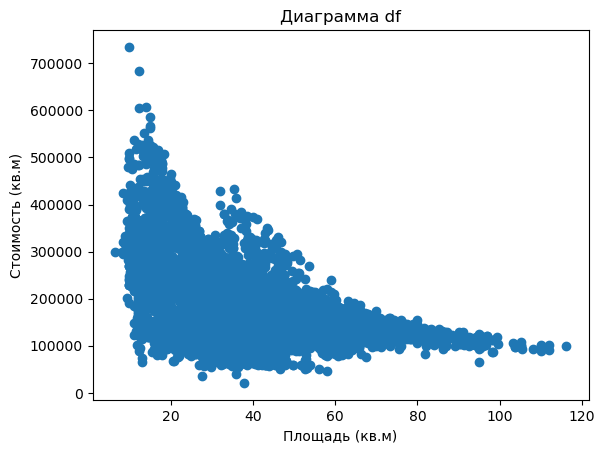

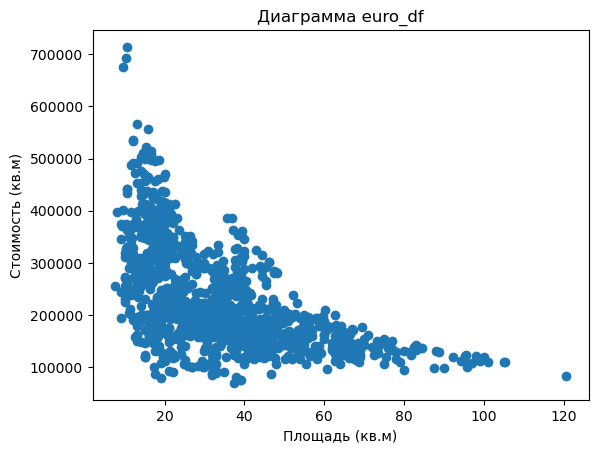

In [12]:
#df
%matplotlib inline 
plt.scatter(df['area'], df['price_sq'])
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Стоимость (кв.м)')
plt.title('Диаграмма df')
plt.show()

#euro_df
plt.scatter(euro_df['area'], euro_df['price_sq'])
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Стоимость (кв.м)')
plt.title('Диаграмма euro_df')
plt.show()

In [13]:
# Создаем модель
model = DecisionTreeRegressor(random_state=42)

In [14]:
# Обучаем модель
model.fit(data[['area']], data['price_sq'])

DecisionTreeRegressor(random_state=42)

In [15]:
# Прогнозирование цен на квартиры
data['predicted_price'] = model.predict(data[['area']])

# Сохраняем результаты в новый файл
data.to_excel("flats.xlsx", index=False)

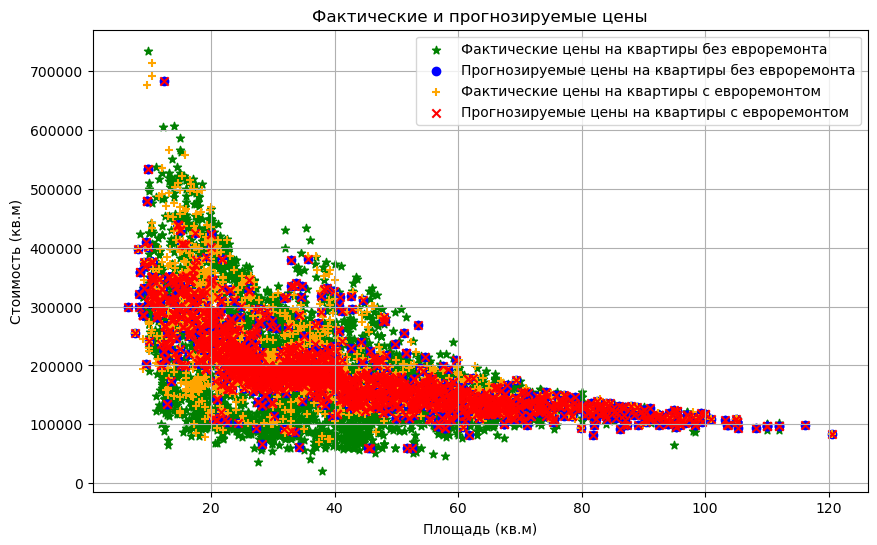

In [16]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price_sq'], color='green', marker='*', label='Фактические цены на квартиры без евроремонта')
plt.scatter(data['area'], data['predicted_price'], color='blue', marker='o', label='Прогнозируемые цены на квартиры без евроремонта')
plt.scatter(euro_df['area'], euro_df['price_sq'], color='orange', marker='+', label='Фактические цены на квартиры с евроремонтом')  
plt.scatter(data['area'], data['predicted_price'], color='red', marker='x', label='Прогнозируемые цены на квартиры с евроремонтом')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Стоимость (кв.м)')
plt.title('Фактические и прогнозируемые цены')
plt.legend()
plt.grid()
plt.show()